## GMM EM

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Data drawn from bivariate normal distribution.

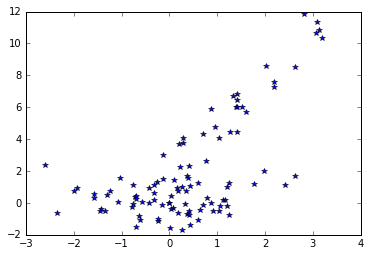

In [2]:
pi = [0.7, 0.3]
mu = [[0, 0], [1, 5]]
sigma = [[[1, 0], [0, 1]],  [[1, 3], [3, 10]]]
xy = np.array([[0,0], [0,0]])
for k in range(2):
    xy = np.append(xy, np.random.multivariate_normal(mu[k], sigma[k], int(100*pi[k])), axis=0)
plt.plot(np.transpose(xy)[0], np.transpose(xy)[1], '*')
plt.show()

In [3]:
def pdf(x, mu, sigma): #  pdf
    mu = np.array(mu)
    x = np.array(x)
    g1 = 1/np.sqrt((2*np.pi)**(len(mu))*np.linalg.det(sigma))
    return g1*np.exp(-0.5*(x-mu).dot(np.linalg.inv(sigma)).dot(x-mu))

In [4]:
def calc_gamma(x, pi, mu, sigma): #  p(z|x_i)
    gamma = np.zeros(len(pi))
    for k in range(len(pi)):
        gamma[k] = pi[k] * pdf(x, mu[k], sigma[k])
    return gamma/sum(gamma)

In [5]:
calc_gamma(xy[0], pi, mu, sigma)

array([ 0.96601624,  0.03398376])

Initial values:

In [6]:
pi = [0.1, 0.9]
mu = [[-10, 10], [0, -5]]
sigma = [[[3, 1], [1, 6]],  [[1, 0], [0, 1]]]

EM 

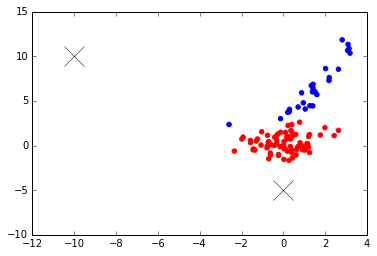

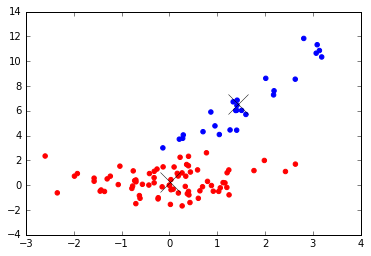

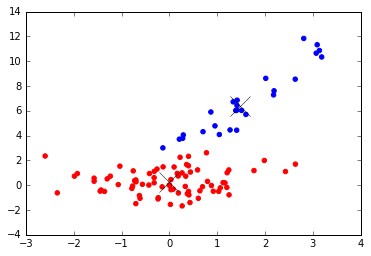

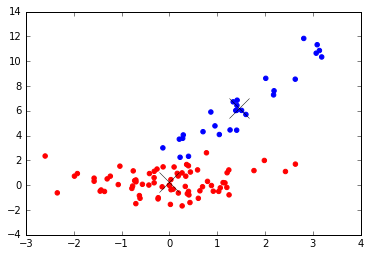

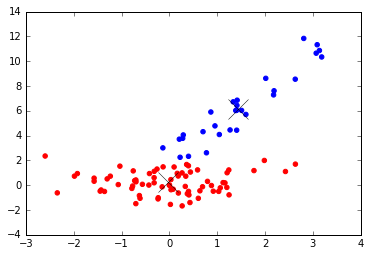

In [7]:
# TODO: add convergence condition
n_iter = 5
for step in range(n_iter):
    # E step
    nk = np.zeros(np.array(pi).shape)
    gammas = []
    for i in range(len(xy)):
        nk += calc_gamma(xy[i], pi, mu, sigma)
        gammas.append(calc_gamma(xy[i], pi, mu, sigma))
    gammas = np.transpose(gammas)
    # ------------
    plt.scatter(np.transpose(xy)[0], np.transpose(xy)[1], 
             color=np.array(['r','b'])[np.round(gammas[0]).astype('int')])
    plt.plot(mu[0][0],mu[0][1], 'xk', markersize=20)
    plt.plot(mu[1][0],mu[1][1], 'xk', markersize=20)
    plt.show()
    # M step
    for k in range(2):
        mu_new = np.dot(gammas[k], xy)
        mu[k] = mu_new/nk[k]
    for k in range(2):
        sigma_new = np.zeros(np.array(sigma[0]).shape)
        for i in range(len(xy)):
            sigma_new += gammas[k][i]*((xy[i]-mu[k])[:, None]*(xy[i]-mu[k]))
        sigma[k] = sigma_new/nk[k]
    pi = nk/len(xy)
    # -----------